In [8]:
using Rasters, ArchGDAL, Statistics, Plots

# 1. Evita restricciones artificiales de memoria
Rasters.checkmem!(false)

# 2. Leer ruta compartida (asegúrate de que el Notebook 1 ya creó este archivo)
path = strip(read("s2_shared_path.txt", String))

# 3. FUNCIÓN DE BENCHMARK (proxy + mean)
function process_band_mean(path)
    ArchGDAL.read(path) do ds
        r   = Raster(ds)[Band(1)]   # Modo proxy, solo lee la banda 4
        res = r .* 1.5              # Operación aritmética lazy
        return mean(res)            # Fuerza la ejecución mediante streaming
    end
end

# 4. WARM-UP (Fundamental en Julia para compilar el código antes de medir)
process_band_mean(path)
GC.gc()

# 5. BENCHMARK REAL
t0 = time_ns()
m_julia = process_band_mean(path)
t1 = time_ns()

t_julia = (t1 - t0) / 1e9

println("🟣 Julia: ", round(t_julia, digits=3), " seg | mean = ", round(m_julia, digits=6))

# 6. Generar el gráfico (Plot) fuera del tiempo medido
ArchGDAL.read(path) do ds
    r   = Raster(ds)[Band(1)]
    res = r .* 1.5
    p = plot(res, colormap = :terrain, title = "Julia: Banda 4 × 1.5")
    savefig(p, "julia_plot.png")
end

# Esta debe ser la última línea para que Jupyter muestre el valor del tiempo
t_julia

🟣 Julia: 7.108 seg | mean = 3766.62463


7.10847472

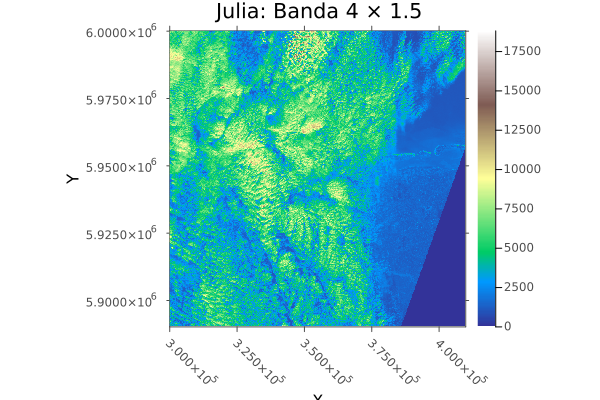

In [10]:
# ------------------------------------------------
# 5. Plot (FUERA DEL BENCHMARK, proxy)
# ------------------------------------------------
ArchGDAL.read(path) do ds
    r   = Raster(ds)[Band(1)]
    res = r .* 1.5
    
    # Creamos el objeto del gráfico
    p = plot(res, colormap = :terrain, title = "Julia: Banda 4 × 1.5")
    
    # OPCIONAL: Guardar el archivo
    savefig(p, "julia_plot.png")
    
    # FUNDAMENTAL: Llamar a p para que Jupyter lo renderice
    display(p) 
end